In [1]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
country = 'Russian Federation'
year = 1999

    # Считываем информацию по мужчинам и женщинам
data_male = pd.read_excel('age_data.xls', sheet_name='m; 1950-2005, estimates', skiprows=range(0, 5))
data_male = data_male[data_male['Major area, region, country or area*'] == country]
data_male = data_male[data_male['Reference date (as of 1 July)'] > year]
data_male = data_male.rename(columns={'Reference date (as of 1 July)': 'year',
                                          'Male population by five-year age groups (thousands)': '0 - 4',
                                          'Unnamed: 7': '5 - 9', 'Unnamed: 8': '10 - 14', 'Unnamed: 9': '15 - 19',
                                          'Unnamed: 10': '20 - 24', 'Unnamed: 11': '25 - 29', 'Unnamed: 12': '30 - 34',
                                          'Unnamed: 13': '35 - 39', 'Unnamed: 14': '40 - 44', 'Unnamed: 15': '45 - 49',
                                          'Unnamed: 16': '50 - 54', 'Unnamed: 17': '55 - 59', 'Unnamed: 18': '60 - 64',
                                          'Unnamed: 19': '65 - 69', 'Unnamed: 20': '70 - 74', 'Unnamed: 21': '75 - 79',
                                          'Unnamed: 22': '80 - 84', 'Unnamed: 23': '85 - 89', 'Unnamed: 24': '90 - 94',
                                          'Unnamed: 25': '95 - 99', 'Unnamed: 26': '100+'})
data_male = data_male.reset_index().drop(
        columns={'index', 'Index', 'Variant', 'Major area, region, country or area*', 'Notes', 'Country code'}, axis=1)

data_female = pd.read_excel('age_data.xls', sheet_name='f; 1950-2005, estimates', skiprows=range(0, 5))
data_female = data_female[data_female['Major area, region, country or area*'] == country]
data_female = data_female[data_female['Reference date (as of 1 July)'] > year]
data_female = data_female.rename(columns={'Reference date (as of 1 July)': 'year',
                                              'Female population by five-year age groups (thousands)': '0 - 4',
                                              'Unnamed: 7': '5 - 9', 'Unnamed: 8': '10 - 14', 'Unnamed: 9': '15 - 19',
                                              'Unnamed: 10': '20 - 24', 'Unnamed: 11': '25 - 29',
                                              'Unnamed: 12': '30 - 34', 'Unnamed: 13': '35 - 39',
                                              'Unnamed: 14': '40 - 44', 'Unnamed: 15': '45 - 49',
                                              'Unnamed: 16': '50 - 54', 'Unnamed: 17': '55 - 59',
                                              'Unnamed: 18': '60 - 64', 'Unnamed: 19': '65 - 69',
                                              'Unnamed: 20': '70 - 74', 'Unnamed: 21': '75 - 79',
                                              'Unnamed: 22': '80 - 84', 'Unnamed: 23': '85 - 89',
                                              'Unnamed: 24': '90 - 94', 'Unnamed: 25': '95 - 99',
                                              'Unnamed: 26': '100+'})
data_female = data_female.reset_index().drop(
        columns={'index', 'Index', 'Variant', 'Major area, region, country or area*', 'Notes', 'Country code'}, axis=1)

m_2000_data = data_male[data_male['year'] == 2000]
m_2005_data = data_male[data_male['year'] == 2005]
m_2000_array = numpy.delete(m_2000_data.to_numpy()[0], 0)
m_2005_array = numpy.delete(m_2005_data.to_numpy()[0], 0)


f_2000_data = data_female[data_female['year'] == 2000]
f_2005_data = data_female[data_female['year'] == 2005]
f_2000_array = numpy.delete(f_2000_data.to_numpy()[0], 0)
f_2005_array = numpy.delete(f_2005_data.to_numpy()[0], 0)

print(f_2005_array)

[3516.752 3212.522 3951.828 5901.66 6095.06 5488.43 5133.842 4775.562
 5812.684 6329.395 5766.926 4592.2 2828.547 4671.97 3082.444 3060.767
 1552.632 607.356 306.417 60.79 6.415]


Коэффициент выживания

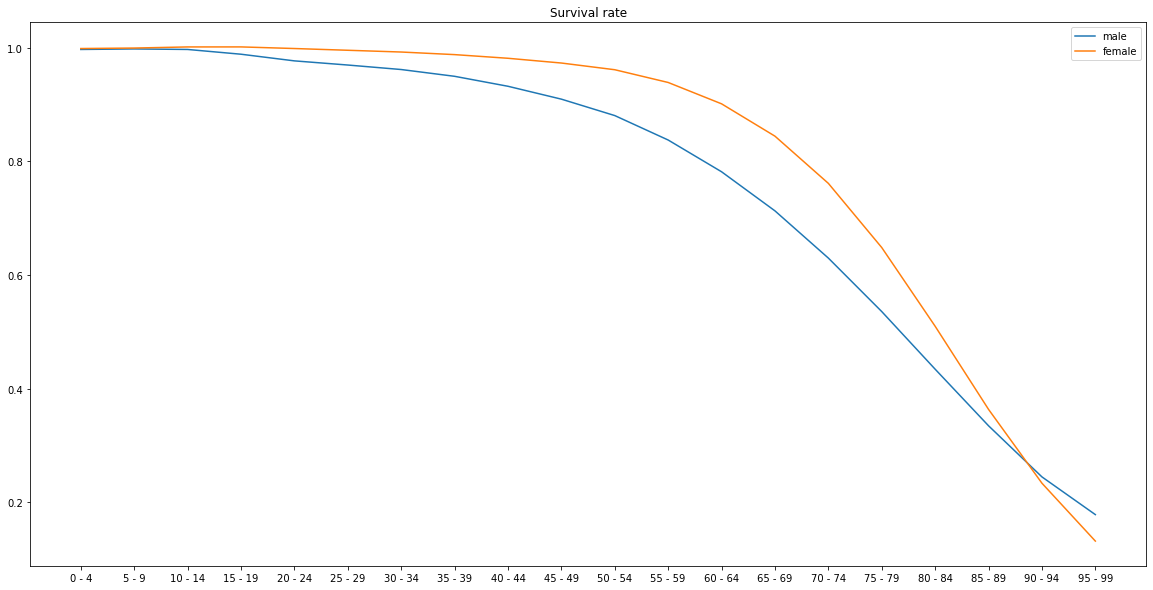

In [3]:
m_survival = []
f_survival = []
for i in range(1, len(m_2005_array)):
    m_survival.append(m_2005_array[i] / m_2000_array[i - 1])
for i in range(1, len(f_2005_array)):
    f_survival.append(f_2005_array[i] / f_2000_array[i - 1])
x_axis = numpy.delete(data_male.axes[1].values, [0, 21])
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Survival rate")

plt.plot(x_axis, m_survival, label='male')
plt.plot(x_axis, f_survival, label='female')
plt.legend()
plt.show()

Фертильность

In [4]:
fertile_women = data_female[['year', '20 - 24', '25 - 29', '30 - 34', '35 - 39']]
fertile_women = fertile_women[fertile_women.year == 2005]
fertile_women = numpy.delete(fertile_women.to_numpy()[0], 0).sum()
children = m_2005_array[0] + f_2005_array[0]
fertility_rate = (children / fertile_women / 5)
print(fertility_rate);


0.06723548722661546


Соотношение малчиков и девочек

In [5]:
m_to_f = m_2000_array[0] / f_2000_array[0]
male_born_percent = m_2000_array[0] / (m_2000_array[0] + f_2000_array[0])
female_born_percent = 1 - male_born_percent
print(m_to_f)

1.04976462112175


Приведение коэффициентов выживания к шагу 1 год

In [6]:
m_survival_per_year = []
f_survival_per_year = []
for i in range(0, len(m_survival)):
    m_survival_per_year.append(pow(m_survival[i], 1 / 5))
    f_survival_per_year.append(pow(f_survival[i], 1 / 5))
print(m_survival_per_year)
print(f_survival_per_year)


[0.99936855479529, 0.9995561275407077, 0.9993696187105696, 0.9976847515121225, 0.9953094686941201, 0.9938140282316913, 0.9921873092642235, 0.989712509228971, 0.986028704945102, 0.9811876826002387, 0.9748688157428617, 0.9651520641029884, 0.9519131711260554, 0.9345324760600713, 0.9116504885754809, 0.8825997482715315, 0.8463188016273951, 0.8033462567608164, 0.7545844749234816, 0.7083157034973804]
[0.999698702612715, 0.9998654836668274, 1.0002576520218294, 1.0002678087865118, 0.9996993474226259, 0.9990835640746368, 0.9984625446880502, 0.9975433122456404, 0.9962386014411552, 0.9945357754023939, 0.9921135969708722, 0.9874381746396653, 0.9794040985108317, 0.9667084321380502, 0.9468911561144402, 0.9169505047671094, 0.8739128119590305, 0.8167497682797109, 0.7476062609917384, 0.666669147163334]


Спрогнозировать изменение численности населения страны и демографический профиль на 100 лет

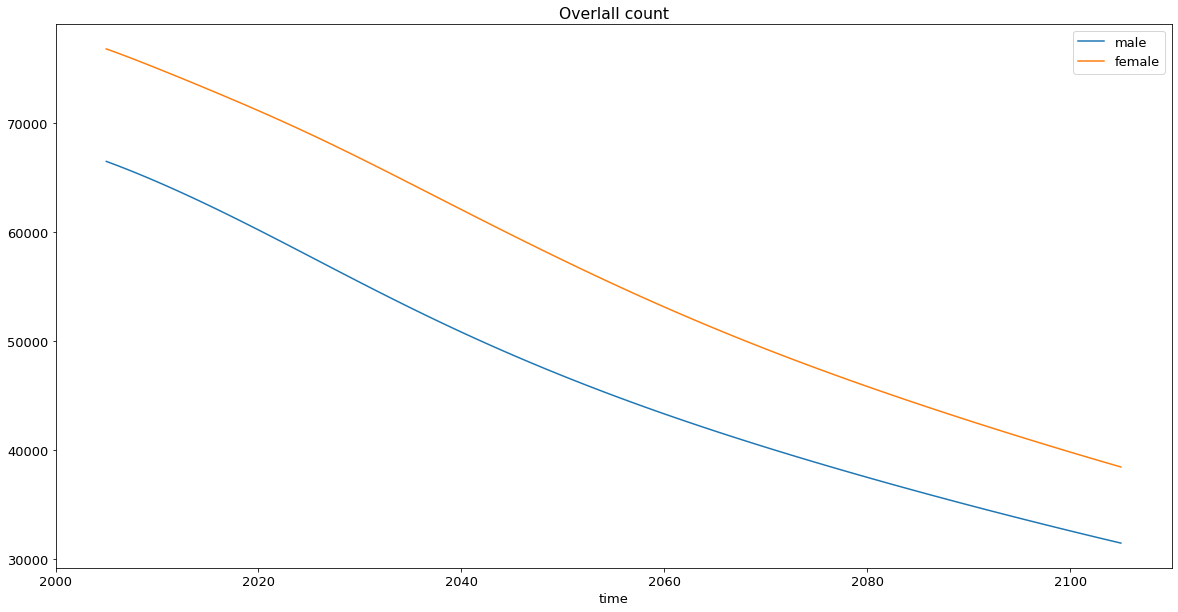

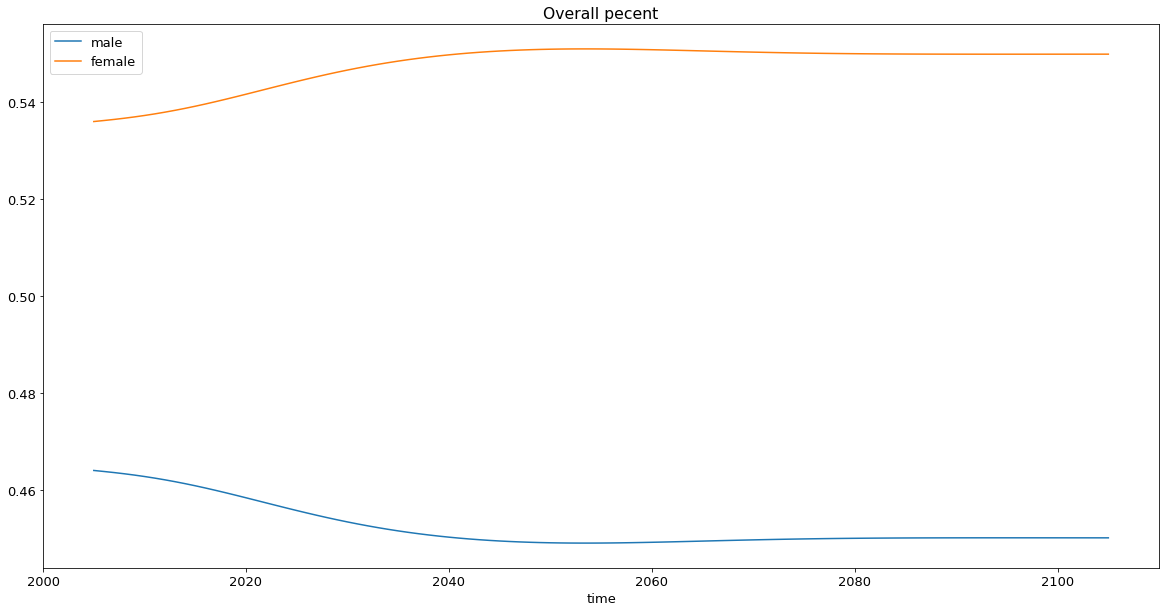

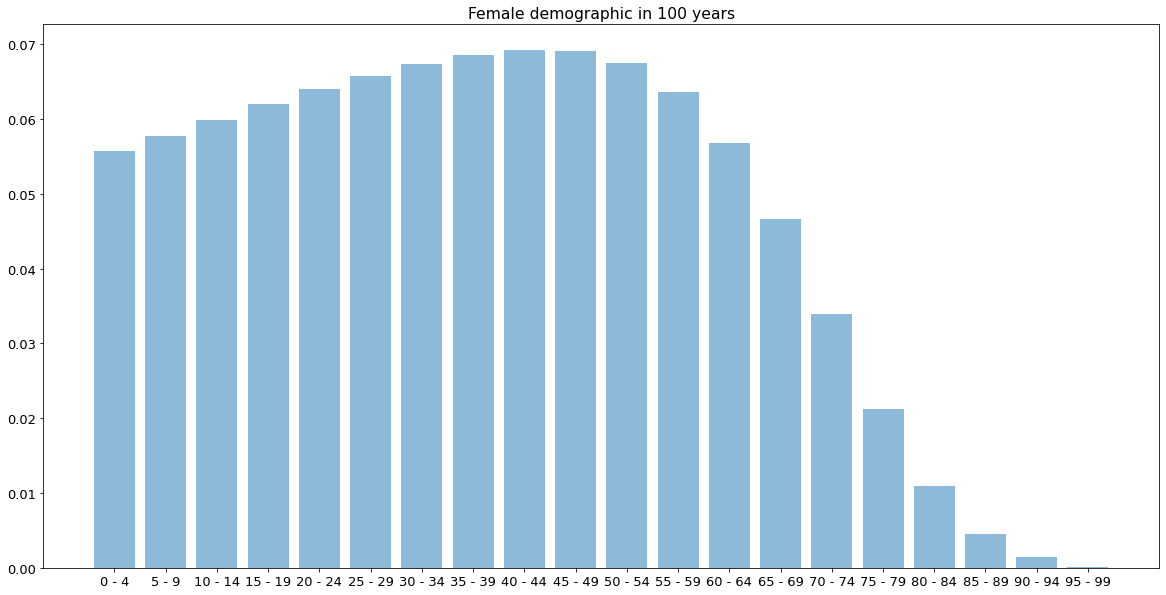

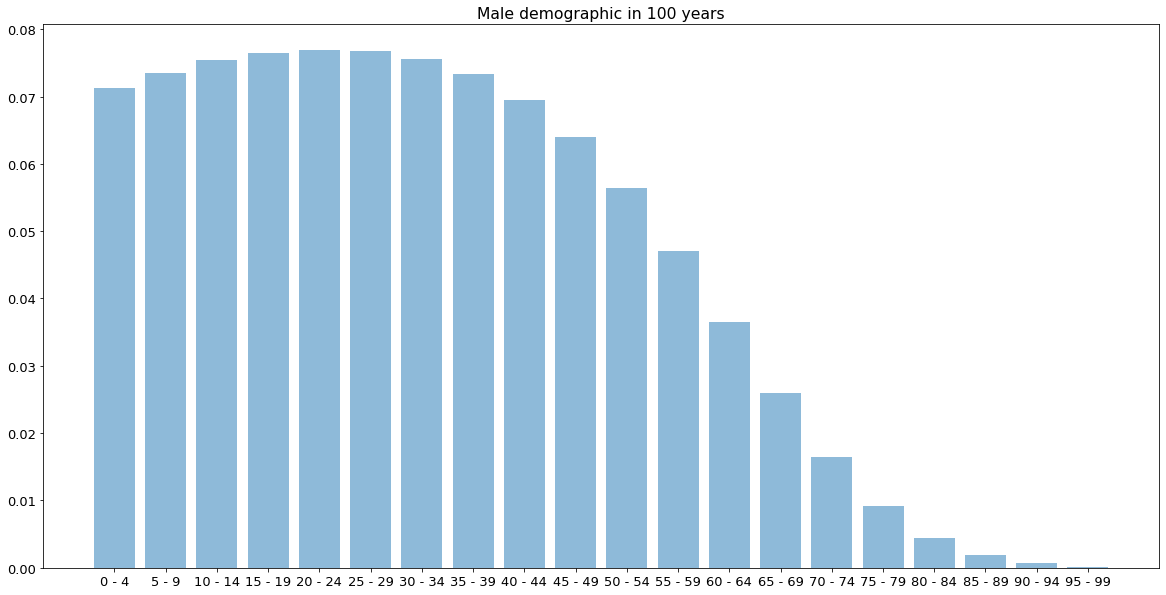

In [7]:
male = m_2005_array
female = f_2005_array

male_overall = [m_2005_array.sum()]
female_overall = [f_2005_array.sum()]
male_percent = [m_2005_array.sum()/(m_2005_array.sum()+f_2005_array.sum())];
female_percent = [f_2005_array.sum()/(m_2005_array.sum()+f_2005_array.sum())];
cycles = 100

for t in range(0, cycles):
    new_male = male
    new_female = female
    for i in reversed(range(0, len(male)-1)):
        if i != 0:
            # При равномерном распределении каждый год считаем, что (1/5 * коэффициент выживаемости) группы переходит в следующую
            new_male[i] = new_male[i] * m_survival_per_year[i] * 4 / 5 + new_male[i - 1] * m_survival_per_year[i-1] * 1 / 5
            new_female[i] = new_female[i] * f_survival_per_year[i] * 4 / 5 + new_female[i - 1] * f_survival_per_year[i-1] * 1 / 5
        else:
            # В группе 0 - 4 остается 4/5 текущей популяции + фертильность * кол-во фертильных женщин
            new_male[i] = new_male[i] * m_survival_per_year[i] * 4 / 5 + male_born_percent * fertility_rate * sum(new_female[3:8])
            new_female[i] = new_female[i] * f_survival_per_year[i] * 4 / 5 + female_born_percent * fertility_rate * sum(new_female[3:8])

    male_overall.append(numpy.sum(new_male))
    female_overall.append(numpy.sum(new_female))
    male_percent.append(numpy.sum(new_male) / (numpy.sum(new_male) + numpy.sum(new_female)))
    female_percent.append(numpy.sum(new_female) / (numpy.sum(new_male) + numpy.sum(new_female)))
    male = new_male
    female = new_female

time_points = range(2005, 2005 + cycles + 1);

plt.rc('font', size=13)
plt.title("Overlall count")
plt.plot(time_points, male_overall, label="male")
plt.plot(time_points, female_overall, label="female")
plt.legend()
plt.xlabel('time')
plt.show()

# Прогноз
plt.title("Overall pecent")
plt.plot(time_points, male_percent, label="male")
plt.plot(time_points, female_percent, label="female")
plt.legend()
plt.xlabel('time')
plt.show()

f_demographic = []
for i in range(1, len(female)):
    f_demographic.append(female[i]/numpy.sum(female))


plt.title("Female demographic in 100 years")
plt.bar(x_axis,f_demographic,align="center", alpha=0.5)
plt.show()

m_demographic = []
for i in range(1, len(male)):
    m_demographic.append(male[i]/numpy.sum(male))


plt.title("Male demographic in 100 years")
plt.bar(x_axis,m_demographic,align="center", alpha=0.5)
plt.show()